In [1]:
#scrap info

In [2]:
import time
import requests
import matplotlib.pyplot as plt


In [3]:
import tools.scraping as weather
import tools.dataset as ds

In [4]:
date="2017-12-11"

In [5]:
weather.getWeather(date, "Madrid")

{'Tmax_C': 10.2,
 'Tmin_C': 4.3,
 'Prec_lm2': 0.0,
 'Wind_ms': 3.1,
 'Direction': 24.0}

### Load datase

In [6]:
date1=ds.setDate("2017-12-11")
print("Fecha ",date1)
#print("Periodo ",ds.getPeriod())
delta=ds.setDelta(40)
print("Delta ",delta)
df_pollution=ds.getDataset(date1, delta)
print("Tamaño dataset ",df_pollution.shape)
df_pollution.head()

Fecha  2017-12-11
Delta  40 days, 0:00:00
Tamaño dataset  (279216, 16)


,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017


### Convertir date en el index de las filas y agrupar valores

In [7]:
df_pollution=ds.dateToIndex(df_pollution)
df_pollution_mean=ds.meanbyDate(df_pollution)
df_pollution_mean.head()

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
datetime,,,,,,,,,,,,,,,
2017-01-01 01:00:00,1.38,NaN,0.61,0.150,0.166667,44.333333,47.541667,NaN,4.846154,25.000000,28.666667,13.8,1.543333,2.74,28079037.75
2017-01-01 02:00:00,1.52,NaN,0.63,0.175,0.190000,65.375000,53.000000,NaN,4.230769,45.666667,47.500000,11.1,1.583333,3.24,28079037.75
2017-01-01 03:00:00,1.92,NaN,0.60,0.225,0.176667,62.208333,52.666667,NaN,4.307692,40.555556,46.666667,9.2,1.590000,3.86,28079037.75
2017-01-01 04:00:00,1.48,NaN,0.58,0.200,0.166667,57.083333,50.125000,NaN,4.769231,32.200000,30.166667,8.7,1.590000,2.98,28079037.75
2017-01-01 05:00:00,1.32,NaN,0.48,0.150,0.160000,41.583333,44.750000,NaN,4.923077,25.454545,24.333333,9.6,1.583333,2.56,28079037.75


### Pintar grafica

In [8]:
#date=datetime.date(2017,1,20)
#dateDelta=datetime.timedelta(days=4)
filter_before=df_pollution_mean.index.date>=(date1-delta)
filter_after=df_pollution_mean.index.date<=(date1+delta)

a=df_pollution_mean[filter_before & filter_after]

                         
    

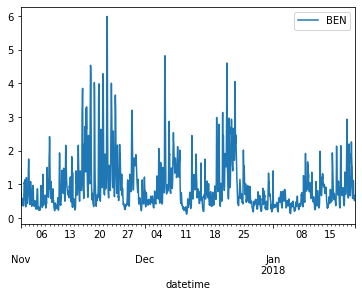

In [9]:
a[["BEN"]].plot()
